###### In this project you are going to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc. The dataset you are going to use is from European Soccer Database (https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.

In [98]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [26]:
#Create Connection
cnx= sqlite3.connect('database.sqlite')

In [27]:
#Check all the tables exist into databse
table_df= pd.read_sql_query("SELECT name FROM sqlite_master WHERE type ='table' AND name NOT LIKE 'sqlite_%'",cnx)
table_df.head(2)

,name
0,Player_Attributes
1,Player


In [28]:
#Read the tables
player_df= pd.read_sql_query('SELECT * FROM Player_Attributes',cnx)
print(player_df.columns)

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')


In [29]:
player_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [30]:
#check for null values
player_df.shape, player_df.isnull().sum(axis=0)

((183978, 42), id                        0
 player_fifa_api_id        0
 player_api_id             0
 date                      0
 overall_rating          836
 potential               836
 preferred_foot          836
 attacking_work_rate    3230
 defensive_work_rate     836
 crossing                836
 finishing               836
 heading_accuracy        836
 short_passing           836
 volleys                2713
 dribbling               836
 curve                  2713
 free_kick_accuracy      836
 long_passing            836
 ball_control            836
 acceleration            836
 sprint_speed            836
 agility                2713
 reactions               836
 balance                2713
 shot_power              836
 jumping                2713
 stamina                 836
 strength                836
 long_shots              836
 aggression              836
 interceptions           836
 positioning             836
 vision                 2713
 penalties               836


In [9]:
#drop null value
row=player_df.shape[0]
df=player_df.dropna()
df.shape, df.isnull().sum(axis=0)

((180354, 42), id                     0
 player_fifa_api_id     0
 player_api_id          0
 date                   0
 overall_rating         0
 potential              0
 preferred_foot         0
 attacking_work_rate    0
 defensive_work_rate    0
 crossing               0
 finishing              0
 heading_accuracy       0
 short_passing          0
 volleys                0
 dribbling              0
 curve                  0
 free_kick_accuracy     0
 long_passing           0
 ball_control           0
 acceleration           0
 sprint_speed           0
 agility                0
 reactions              0
 balance                0
 shot_power             0
 jumping                0
 stamina                0
 strength               0
 long_shots             0
 aggression             0
 interceptions          0
 positioning            0
 vision                 0
 penalties              0
 marking                0
 standing_tackle        0
 sliding_tackle         0
 gk_diving              

In [31]:
#number of rows deleted
row- df.shape[0]

3624

In [43]:
df['overall_rating'] = df['overall_rating'].astype('int')
df.corr(method='pearson',min_periods=1).sort_values('overall_rating', ascending=False)

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
overall_rating,-0.003738,-0.278703,-0.328315,1.000000,0.765435,0.357320,0.330079,0.313324,0.458243,0.361739,...,0.431493,0.392715,0.132185,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804
reactions,-0.005740,-0.233465,-0.312538,0.771856,0.580991,0.384999,0.354769,0.295601,0.460469,0.397448,...,0.452559,0.390045,0.123173,0.159255,0.137098,-0.073940,-0.079753,-0.033067,-0.078091,-0.078300
potential,0.000837,-0.021252,0.010588,0.765435,1.000000,0.277284,0.287838,0.206063,0.382538,0.301678,...,0.379278,0.315207,0.054094,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936
short_passing,-0.006701,-0.065311,-0.090237,0.458243,0.382538,0.790323,0.580245,0.548435,1.000000,0.639995,...,0.766401,0.612511,0.349578,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260
ball_control,-0.013976,-0.024942,-0.053940,0.443991,0.401803,0.807721,0.720694,0.550956,0.890622,0.749459,...,0.773185,0.684410,0.188479,0.252325,0.220588,-0.741678,-0.732701,-0.465803,-0.735166,-0.738085
long_passing,-0.008137,-0.111272,-0.139584,0.434525,0.343133,0.685649,0.341121,0.362741,0.803073,0.414520,...,0.670151,0.476750,0.441837,0.496679,0.462544,-0.464221,-0.466906,-0.261361,-0.468453,-0.469598
vision,-0.007928,-0.163099,-0.188087,0.431493,0.379278,0.693978,0.652376,0.336472,0.766401,0.690716,...,1.000000,0.665802,0.080042,0.144749,0.118656,-0.502582,-0.461778,-0.201738,-0.465109,-0.470499
shot_power,-0.010371,-0.080175,-0.126514,0.428053,0.325459,0.656740,0.727835,0.541365,0.722320,0.746622,...,0.647262,0.680887,0.094068,0.155941,0.117569,-0.584551,-0.589048,-0.398712,-0.591626,-0.593827
penalties,-0.011751,-0.175255,-0.162481,0.392715,0.315207,0.574208,0.726234,0.431291,0.612511,0.713116,...,0.665802,1.000000,-0.043649,0.005405,-0.030404,-0.470286,-0.435311,-0.189194,-0.439610,-0.443635
long_shots,-0.010382,-0.068652,-0.119638,0.392668,0.313059,0.716515,0.806895,0.406003,0.729741,0.814894,...,0.730112,0.714596,-0.011926,0.054655,0.022683,-0.545446,-0.538702,-0.337826,-0.542884,-0.544979


In [46]:
#Considering the feature having co-relation score > 0.35
features= ['reactions','potential','short_passing','ball_control','long_passing','vision','shot_power','penalties','long_shots','positioning','volleys']
X= df[features]
y=df['overall_rating']


In [81]:
#Split test and Train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [82]:
# Using Linear Regression Model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
lm.coef_

array([ 0.35377634,  0.50154326,  0.00086553, -0.02704675,  0.04761147,
       -0.01148395,  0.0493761 ,  0.03050011, -0.01237908, -0.0235623 ,
       -0.00071109])

In [84]:
#Evaluate model Trainig and Test score
print("Intercept      :",lm.intercept_)
print("Training Score :",lm.score(X_train,y_train))
print("Test Score     :",lm.score(X_test,y_test))

Intercept      : 5.27453480084062
Training Score : 0.7619289274285588
Test Score     : 0.7579427409837654


In [86]:
#Getting Error--ValueError: Classification metrics can't handle a mix of multiclass and continuous targets
#y_pred=lm.predict(X_test)
#confusion_matrix(y_test,y_pred)

In [89]:
#Getting Error-- ValueError: Mix type of y not allowed, got types {'continuous', 'multiclass'}
#classification_report(y_test,y_pred)

In [91]:
#Getting Error - Classification metrics can't handle a mix of multiclass and continuous targets
#accuracy_score(y_test,y_pred)

In [92]:
mean_squared_error(y_test,y_pred)

11.907419619371623

Text(0,0.5,'Actual price')

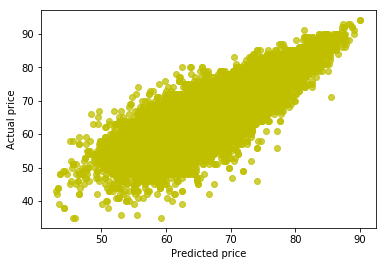

In [96]:
# Scatter plot pred vs actual
plt.scatter(y_pred,y_test,alpha=.75,color='y')
plt.xlabel('Predicted price')
plt.ylabel('Actual price')

In [100]:
#Using statical model 
output=smf.ols(formula='overall_rating~reactions+potential+short_passing+ball_control+long_passing+vision+shot_power+penalties+long_shots+positioning+volleys',data=df).fit()

In [101]:
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                 5.213e+04
Date:                Thu, 14 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:20:10   Log-Likelihood:            -4.7861e+05
No. Observations:              180354   AIC:                         9.572e+05
Df Residuals:                  180342   BIC:                         9.574e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.2662      0.092     57.031      0.000       5.085       5.447
reactions         0.3550      0.001    304.164      0.000       0.353       0.357
potential         0.5001      0.002    322.597      0.000       0.497       0.503
short_passing     0.0031      0.002      1.942      0.052   -2.87e-05       0.006
ball_control     -0.0286      0.001    -19.389      0.000      -0.032      -0.026
long_passing      0.0472      0.001     46.079      0.000       0.045       0.049
vision           -0.0112      0.001    -11.033      0.000      -0.013      -0.009
shot_power        0.0494      0.001     49.070      0.000       0.047       0.051
penalties         0.0308      0.001     35.601      0.000       0.029       0.033
long_shots       -0.0126      0.001    -12.215      0.000      -0.015      -0.011
positioning      -0.0238      0.001    -26.865      0.000      -0.026      -0.022
volleys          -0.0008      0.001     -0.881      0.378      -0.003       0.001
==============================================================================
Omnibus:                    18555.276   Durbin-Watson:                   0.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47798.538
Skew:                          -0.597   Prob(JB):                         0.00
Kurtosis:                       5.222   Cond. No.                     2.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""